# Import Necessary Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [15]:
salary_data_train = pd.read_csv('SalaryData_Train.csv')
salary_data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [16]:
salary_data_test = pd.read_csv('SalaryData_Test.csv')
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Data Understanding

In [17]:
salary_data_train.shape,salary_data_test.shape

((30161, 14), (15060, 14))

In [18]:
salary_data_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
salary_data_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [20]:
salary_data_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [21]:
salary_data_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

# Data Preprocessing

since data set is refering two features of Education we need to drop one

In [22]:
del salary_data_train['educationno']
del salary_data_test['educationno']

In [23]:
le = LabelEncoder()
for column_names in salary_data_train.columns:
    if salary_data_train[column_names].dtype == object:
        salary_data_train[column_names] = le.fit_transform(salary_data_train[column_names])
    else:
        pass

In [24]:
le = LabelEncoder()
for column_names in salary_data_test.columns:
    if salary_data_test[column_names].dtype == object:
        salary_data_test[column_names] = le.fit_transform(salary_data_test[column_names])
    else:
        pass

In [26]:
salary_data_train.dtypes

age              int64
workclass        int32
education        int32
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [27]:
salary_data_test.dtypes

age              int64
workclass        int32
education        int32
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

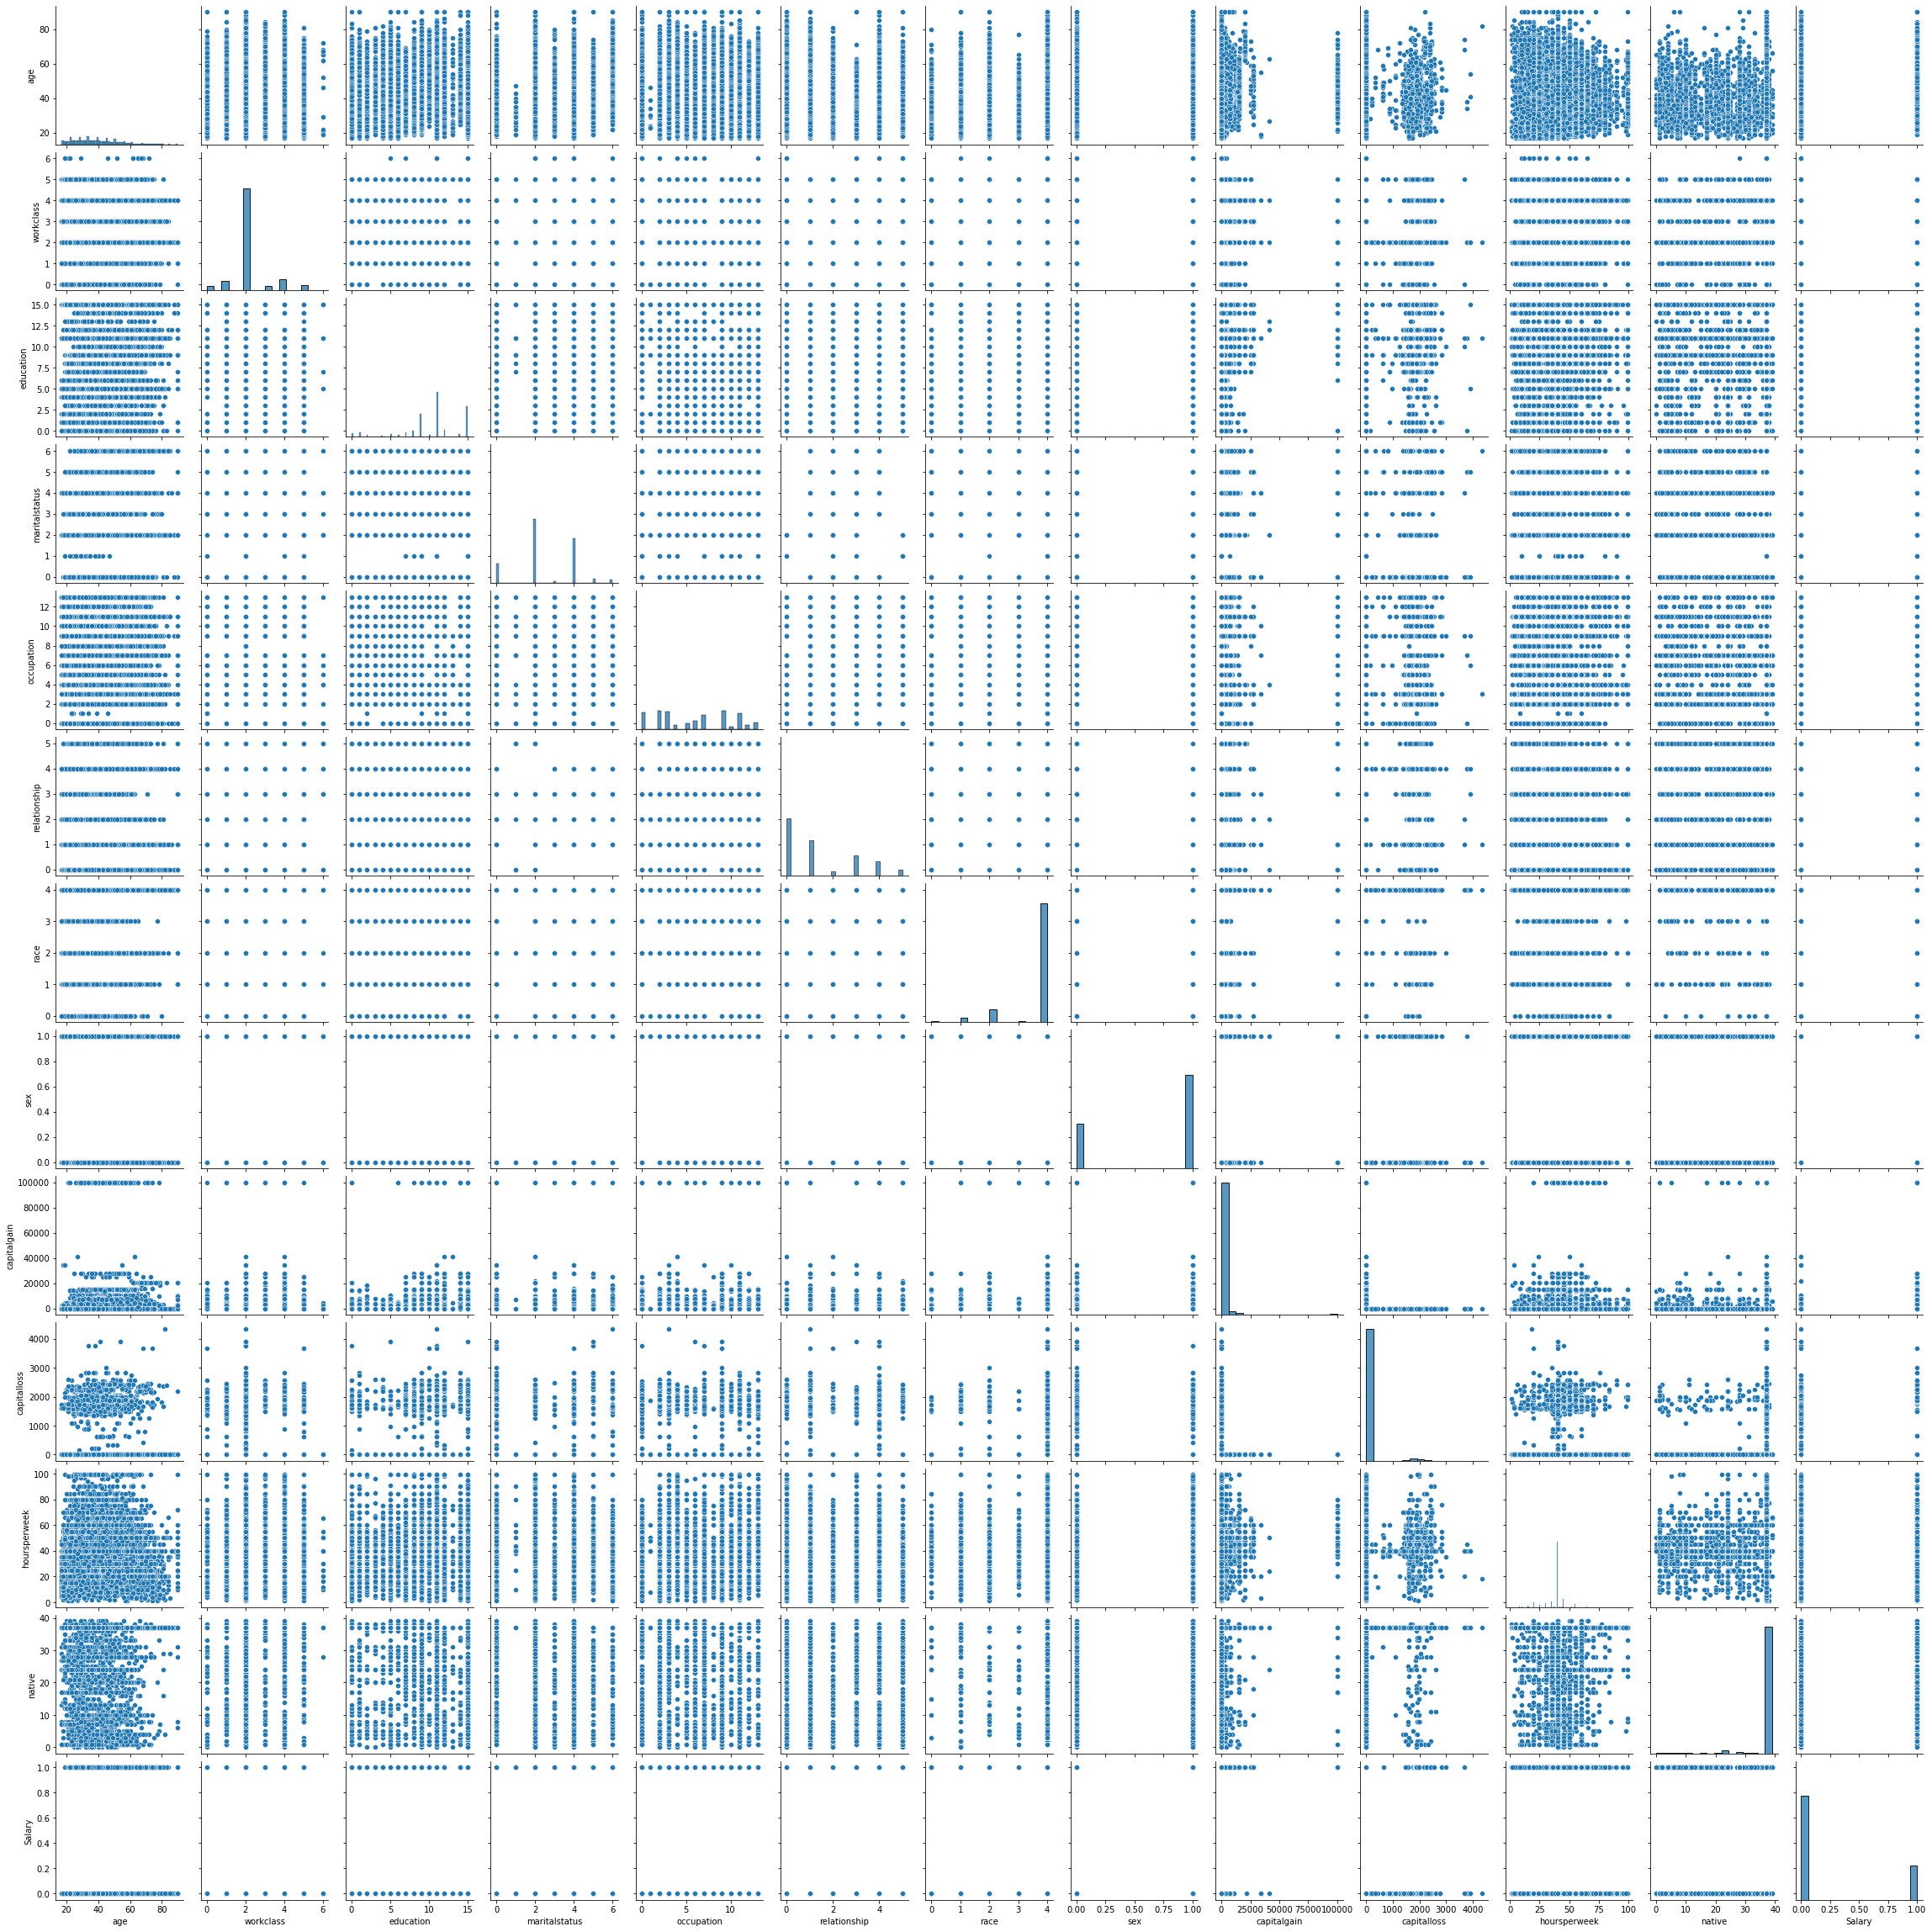

In [32]:
sns.pairplot(data=salary_data_train)
plt.show()

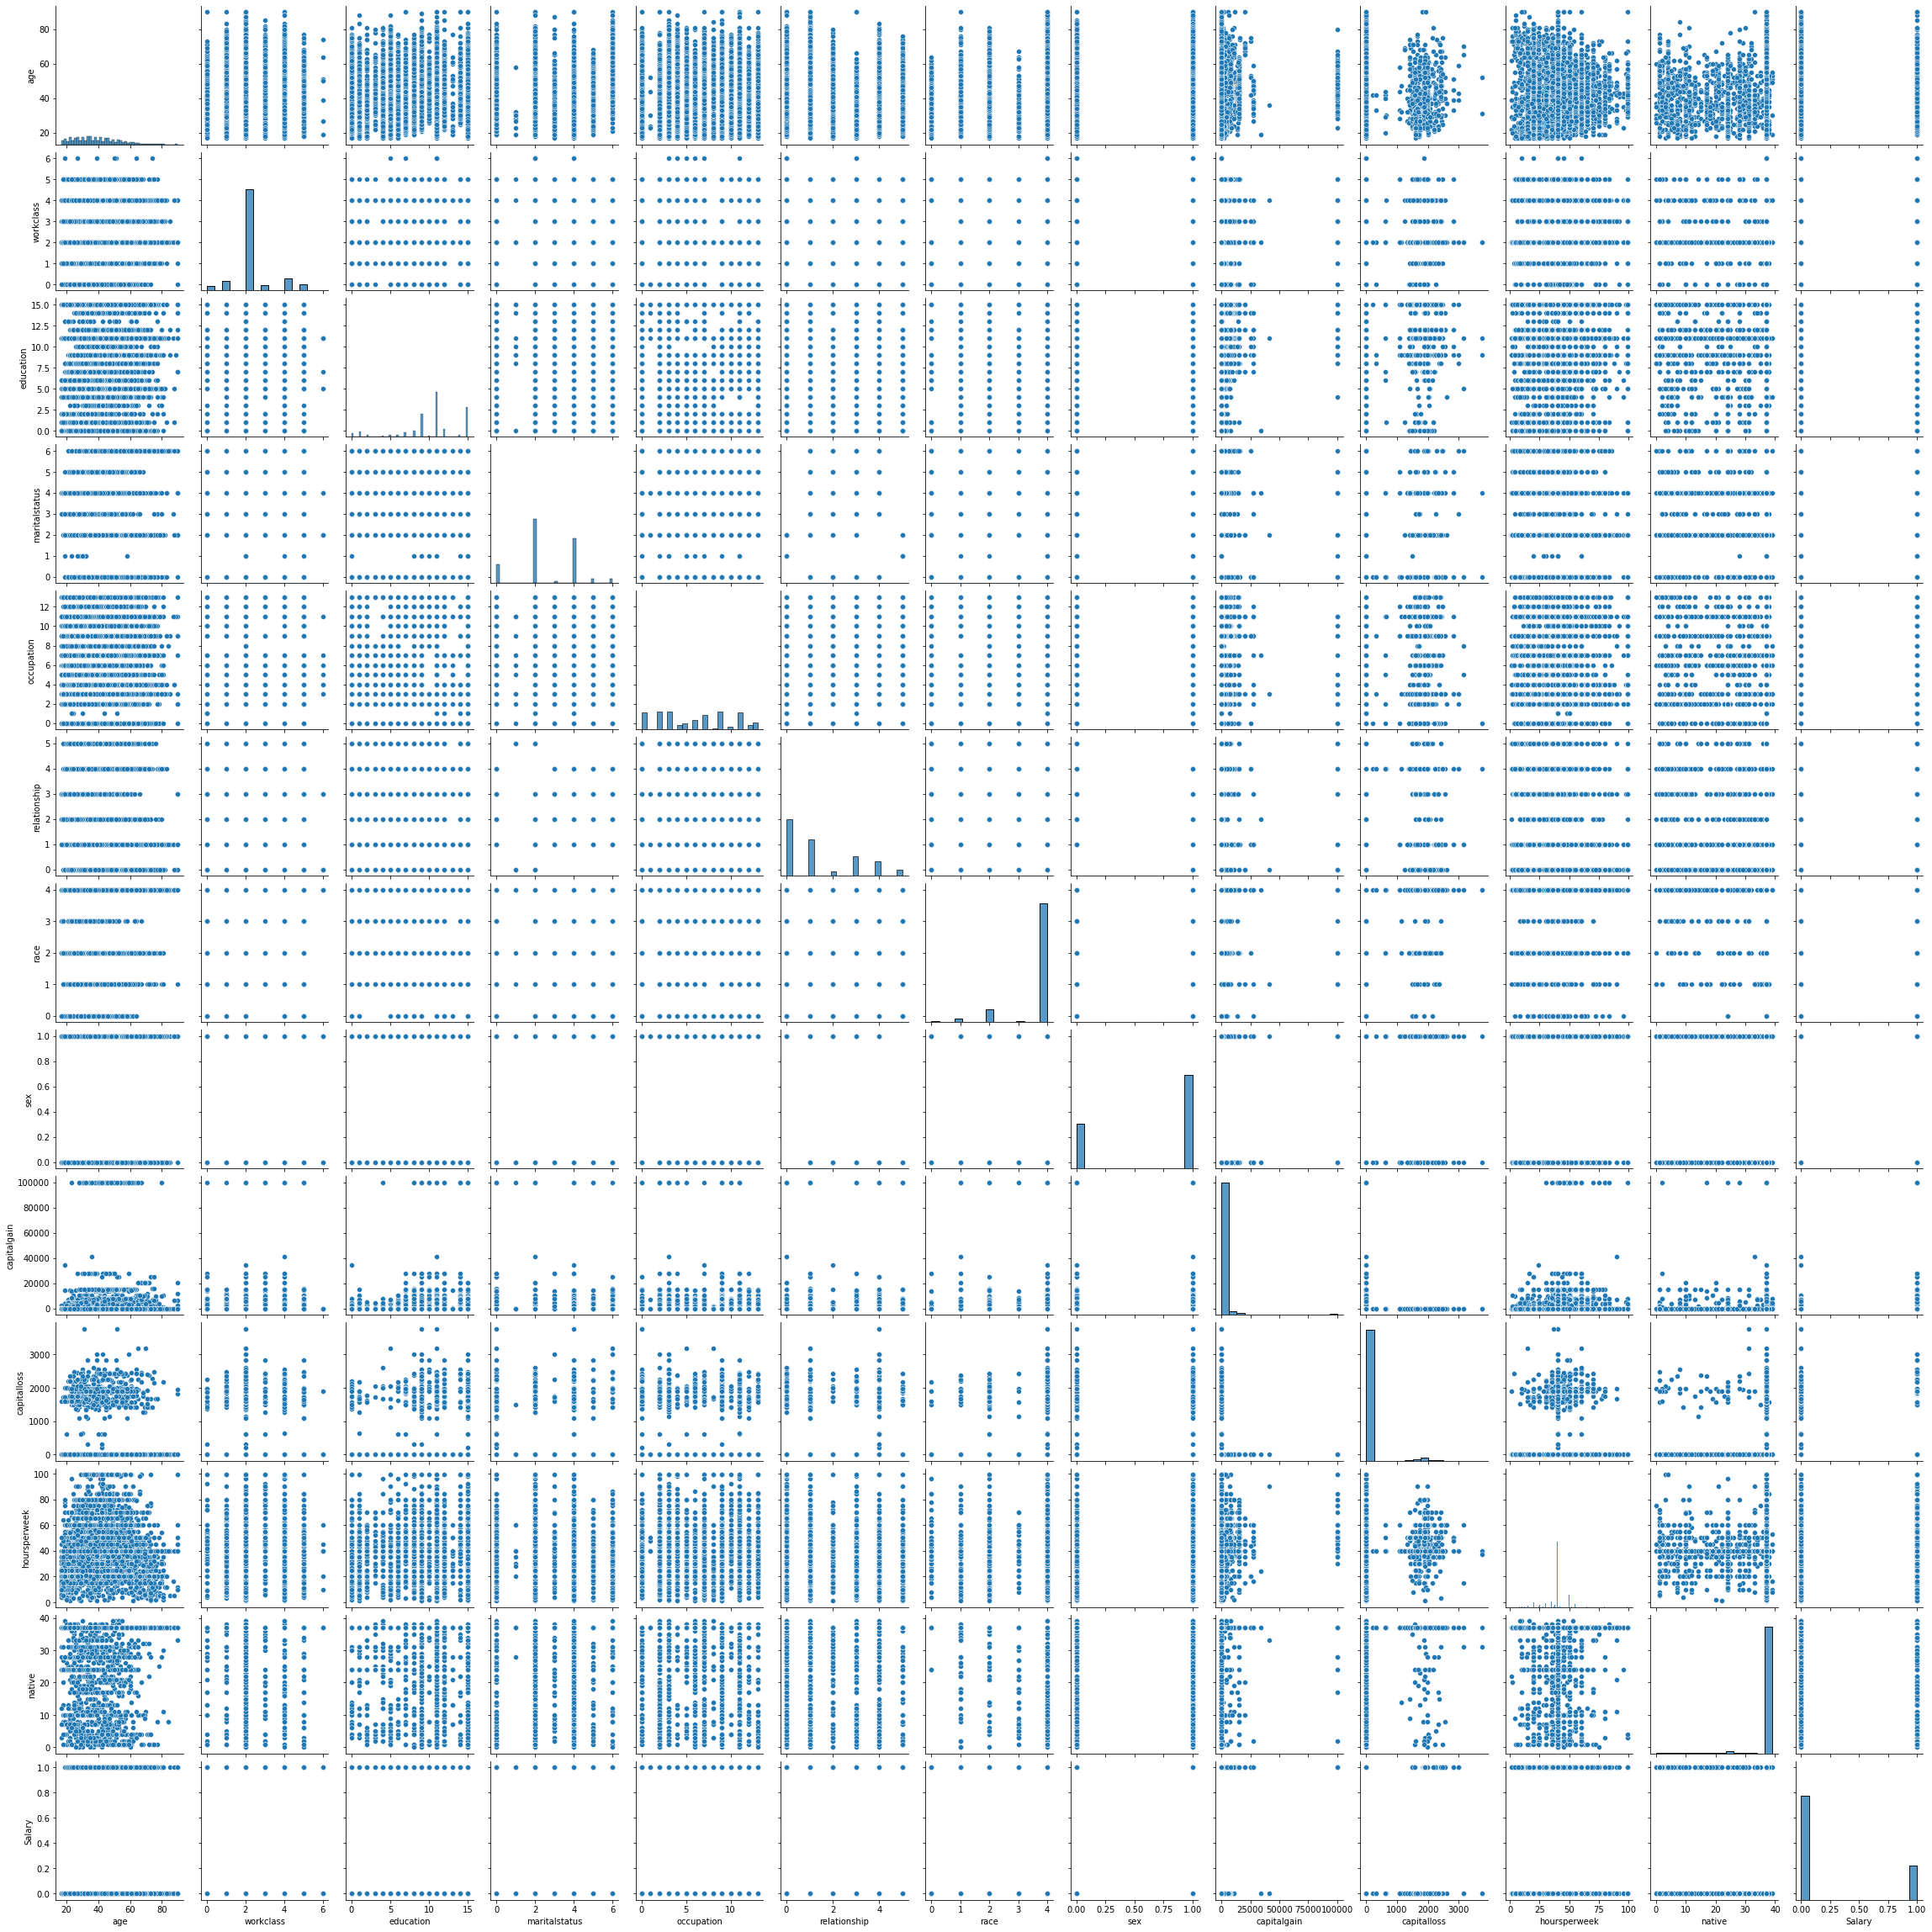

In [33]:
sns.pairplot(data=salary_data_test)
plt.show()

# Model Building

In [34]:
X_train = salary_data_train.drop(labels='Salary',axis=1)
y_train = salary_data_train[['Salary']]

In [35]:
X_test = salary_data_test.drop(labels='Salary',axis=1)
y_test = salary_data_test[['Salary']]

In [36]:
X_train.shape,y_train.shape

((30161, 12), (30161, 1))

In [37]:
X_test.shape,y_test.shape

((15060, 12), (15060, 1))

# Model Training | Model Testing | Model Evaluation

## Using Guassian Naive Bayes

In [38]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train,y_train)

GaussianNB()

In [39]:
y_train_pred = gaussian_model.predict(X_train)

In [40]:
print('Accuracy Score    :',round(accuracy_score(y_train,y_train_pred),4))
print('Precision Score   :',round(precision_score(y_train,y_train_pred),4))
print('Recall Score      :',round(recall_score(y_train,y_train_pred),4))
print('Confusion Matrix  :\n',confusion_matrix(y_train,y_train_pred))

Accuracy Score    : 0.7904
Precision Score   : 0.6716
Recall Score      : 0.3089
Confusion Matrix  :
 [[21519  1134]
 [ 5189  2319]]


In [41]:
y_test_pred = gaussian_model.predict(X_test)

In [42]:
print('Accuracy Score    :',round(accuracy_score(y_test,y_test_pred),4))
print('Precision Score   :',round(precision_score(y_test,y_test_pred),4))
print('Recall Score      :',round(recall_score(y_test,y_test_pred),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_test_pred))

Accuracy Score    : 0.7915
Precision Score   : 0.6636
Recall Score      : 0.307
Confusion Matrix  :
 [[10784   576]
 [ 2564  1136]]


## Using Multinomial Naive Bayes

In [46]:
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train,y_train)

MultinomialNB()

In [47]:
y_train_pred_1 = multinomial_model.predict(X_train)

In [48]:
print('Accuracy Score    :',round(accuracy_score(y_train,y_train_pred_1),4))
print('Precision Score   :',round(precision_score(y_train,y_train_pred_1),4))
print('Recall Score      :',round(recall_score(y_train,y_train_pred_1),4))
print('Confusion Matrix  :\n',confusion_matrix(y_train,y_train_pred_1))

Accuracy Score    : 0.7729
Precision Score   : 0.6302
Recall Score      : 0.2124
Confusion Matrix  :
 [[21717   936]
 [ 5913  1595]]


In [49]:
y_test_pred_1 = multinomial_model.predict(X_test)

In [50]:
print('Accuracy Score    :',round(accuracy_score(y_test,y_test_pred_1),4))
print('Precision Score   :',round(precision_score(y_test,y_test_pred_1),4))
print('Recall Score      :',round(recall_score(y_test,y_test_pred_1),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_test_pred_1))

Accuracy Score    : 0.775
Precision Score   : 0.6245
Recall Score      : 0.2108
Confusion Matrix  :
 [[10891   469]
 [ 2920   780]]


### For Gussian NB we got better results as compared to Multinomial NB

# ===========================THE END==========================